# Cassini Cosmic Dust Analyzer - Project 1: Calibrating CDA
## Part 1: Data Exploration
This is my try on Cassini - Cosmic Dust Analyzer (CDA) EDA.This script will start with a data exploration introduction of CDA's calibration data that were provided by R. Srama from the University of Stuttgart, is the Principal Investigator of CDA.

In this script I am going to unzip and read the calibration experiment data; explore it; obtain the columns of interes and conduct some data engineering and filtering. I will also "add some phyiscs" and store it for later calibration scripts!

## Read in the data

In [22]:
import pathlib
import zipfile
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('dark_background')
plt.rcParams.update({
    "font.size": 14
})

In [23]:
# Open and unzip the data
with zipfile.ZipFile("data/level0/evalu9-QIQTQC.srama_stuebig.4706.txt.zip", 'r') as zip_ref:
    zip_ref.extractall("data/level0")

In [24]:
COL_NAMES = ['REF_NR', \
             'SECONDS', \
             'PSU_VEL', \
             'QP_VEL', \
             'PSU_CHARGE', \
             'MP_PEAKS', \
             'HVC', \
             'X', \
             'Y', \
             'ACC', \
             '#1', \
             'QI', \
             'QI_CHARGE', \
             'QI_T2', \
             'QI_T4', \
             'QI_TR', \
             '#2', \
             'QC', \
             'QC_CHARGE', \
             'QC_T2', \
             'QC_T4', \
             'QC_TR', \
             '#3', \
             'QT', \
             'QT_CHARGE', \
             'QT_T5', \
             'QT_T7', \
             'QT_TR', \
             'TAR']
cal_df = pd.read_csv("data/level0/evalu9-QIQTQC.srama_stuebig.4706.txt", \
                     names=COL_NAMES, \
                     engine='python', \
                     delim_whitespace=True, \
                     usecols = range(29))

<ipython-input-24-74d8d6ce97e7>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cal_df = pd.read_csv("data/level0/evalu9-QIQTQC.srama_stuebig.4706.txt", \


In [25]:
cal_df

,REF_NR,SECONDS,PSU_VEL,QP_VEL,PSU_CHARGE,MP_PEAKS,HVC,X,Y,ACC,...,QC_T2,QC_T4,QC_TR,#3,QT,QT_CHARGE,QT_T5,QT_T7,QT_TR,TAR
0,1.998027e+06,35956,17.40,9.9,1.260000e-15,3,1022,0,10,2000,...,0,233,233,#,QT,4.528350e-15,99,99,0,CAT
1,1.998027e+06,36592,12.35,9.9,9.900000e-16,0,1022,0,10,2000,...,17,83,66,#,QT,4.805130e-15,99,99,0,CAT
2,1.998027e+06,37131,18.70,9.9,2.030000e-15,3,1022,0,10,2000,...,0,183,183,#,QT,3.506570e-15,99,99,0,CAT
3,1.998027e+06,37279,29.10,9.9,2.058000e-15,6,1022,0,10,2000,...,17,50,33,#,QT,2.311490e-14,400,533,133,CAT
4,1.998027e+06,37717,11.00,9.9,2.030000e-15,0,1022,0,10,2000,...,0,150,150,#,QT,4.812730e-15,99,99,0,CAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,2.001347e+06,24385,9.68,9.9,2.429000e-15,7,1021,0,0,2000,...,17,200,183,#,QT,4.713840e-15,99,99,0,cCAT
4702,2.001347e+06,25467,14.78,9.9,9.900000e-16,9,1021,0,0,2000,...,17,150,133,#,QT,5.484850e-15,99,99,0,cCAT
4703,2.001347e+06,25940,14.89,9.9,9.900000e-16,4,1021,0,0,2000,...,100,217,117,#,QT,4.707560e-15,99,99,0,cCAT
4704,2.001347e+06,27189,12.29,9.9,2.506000e-15,6,1021,0,0,2000,...,17,117,100,#,QT,5.882370e-15,99,99,0,cCAT


In [26]:
cal_df.describe()

,REF_NR,SECONDS,PSU_VEL,QP_VEL,PSU_CHARGE,MP_PEAKS,HVC,X,Y,ACC,...,QI_T4,QI_TR,QC_CHARGE,QC_T2,QC_T4,QC_TR,QT_CHARGE,QT_T5,QT_T7,QT_TR
count,4.706000e+03,4706.000000,4706.00000,4.706000e+03,4.706000e+03,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,...,4706.000000,4706.000000,4.706000e+03,4706.000000,4706.000000,4706.000000,4.706000e+03,4706.000000,4706.000000,4706.000000
mean,1.999391e+06,36978.586910,11.74268,9.900000e+00,5.277816e-01,2.431152,1021.408840,-14.594773,-3.213557,1982.851679,...,2423.920314,2411.582873,5.490650e+00,-385.743944,564.566086,950.310030,7.047386e+00,621.475138,3169.007650,2547.532512
std,2.625958e+04,17194.545113,9.77336,1.776546e-15,7.198278e+00,4.394669,0.491672,73.931568,57.944171,118.658934,...,2256.960748,2075.201313,2.266134e+01,911.901970,927.532365,1085.083636,2.545905e+01,2329.759542,3460.160157,2391.259752
min,2.011701e+05,1.000000,0.00000,9.900000e+00,1.330000e-16,0.000000,1021.000000,-140.000000,-80.000000,1000.000000,...,-2133.000000,-33.000000,-1.215210e-14,-4267.000000,-3467.000000,0.000000,-8.681840e-15,-4267.000000,-3200.000000,-15967.000000
25%,1.998048e+06,25675.250000,5.51000,9.900000e+00,2.851500e-15,0.000000,1021.000000,-50.000000,-50.000000,2000.000000,...,633.000000,583.000000,4.662430e-14,-533.000000,99.000000,83.000000,5.340770e-15,0.000000,99.000000,0.000000
50%,2.000259e+06,38068.000000,8.08000,9.900000e+00,7.999950e-15,0.000000,1021.000000,0.000000,0.000000,2000.000000,...,1500.000000,1650.000000,1.277915e-13,17.000000,183.000000,317.000000,3.773695e-14,99.000000,1900.000000,2450.000000
75%,2.001141e+06,52010.250000,14.77000,9.900000e+00,2.241050e-14,4.000000,1022.000000,0.000000,0.000000,2000.000000,...,3912.750000,4250.000000,3.334310e-13,17.000000,1000.000000,1800.000000,1.605148e-13,1133.000000,5800.000000,4433.000000
max,2.001353e+06,65533.000000,69.70000,9.900000e+00,9.900000e+01,20.000000,1022.000000,99.000000,99.000000,2000.000000,...,8083.000000,10567.000000,9.900000e+01,2100.000000,3217.000000,5984.000000,9.900000e+01,15967.000000,15967.000000,11800.000000


In [27]:
cal_df.shape

(4706, 29)

In [28]:
# I want to create the calibration function and comparing them with a literature reference
# For this, we are considering only a selected list of columns:
cal_df = cal_df[["PSU_VEL", "PSU_CHARGE", "MP_PEAKS", "ACC",
                 "QI_CHARGE", "QI_TR",
                 "QC_CHARGE", "QC_TR",
                 "QT_CHARGE", "QT_TR",
                 "TAR"]].copy()
cal_df.loc[:, "TAR"].replace(["oIID", "cIID"], "IID", inplace=True)
cal_df.loc[:, "TAR"].replace(["oCAT", "cCAT"], "CAT", inplace=True)
cal_df = cal_df.loc[cal_df["TAR"].isin(["IID", "CAT"])].copy()
cal_df.reset_index(drop=True, inplace=True)

<ipython-input-28-1d82b410b40b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cal_df.loc[:, "TAR"].replace(["oIID", "cIID"], "IID", inplace=True)


In [29]:
ten_nanoseconds = 10.0 * (10.0 ** (-9.0))
one_microsecond = 1.0 * (10.0 ** (-6.0))
one_femto_coloumb = 10.0 ** (-15.0)
cal_df.loc[:, 'QI_TR'] = cal_df['QI_TR'].apply(lambda x: (x * ten_nanoseconds)                                                        / one_microsecond).copy()
cal_df.loc[:, 'QC_TR'] = cal_df['QC_TR'].apply(lambda x: (x * ten_nanoseconds)                                                        / one_microsecond).copy()
cal_df.loc[:, 'QT_TR'] = cal_df['QT_TR'].apply(lambda x: (x * ten_nanoseconds))
cal_df.loc[:, 'QI_CHARGE'] = cal_df['QI_CHARGE'].apply(lambda x: x / one_femto_coloumb).copy()
cal_df.loc[:, 'QC_CHARGE'] = cal_df['QC_CHARGE'].apply(lambda x: x / one_femto_coloumb).copy()
cal_df.loc[:, 'QT_CHARGE'] = cal_df['QT_CHARGE'].apply(lambda x: x / one_femto_coloumb).copy()
cal_df.loc[:, 'PSU_CHARGE'] = cal_df['PSU_CHARGE'].apply(lambda x: x / one_femto_coloumb).copy()

<ipython-input-29-599546de7034>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.83 8.16 4.   ... 3.33 5.34 4.84]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cal_df.loc[:, 'QI_TR'] = cal_df['QI_TR'].apply(lambda x: (x * ten_nanoseconds)                                                        / one_microsecond).copy()
<ipython-input-29-599546de7034>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.33 0.66 1.83 ... 1.17 1.   1.17]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cal_df.loc[:, 'QC_TR'] = cal_df['QC_TR'].apply(lambda x: (x * ten_nanoseconds)                                                        / one_microsecond).copy()
<ipython-input-29-599546de7034>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a 

In [30]:
cal_df

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,TAR
0,17.40,1.260,3,2000,8.857710,2.83,43.1122,2.33,4.52835,0.000000,CAT
1,12.35,0.990,0,2000,8.392480,8.16,243.3150,0.66,4.80513,0.000000,CAT
2,18.70,2.030,3,2000,3.897020,4.00,47.3741,1.83,3.50657,0.000000,CAT
3,29.10,2.058,6,2000,102.422000,4.33,496.7530,0.33,23.11490,0.000001,CAT
4,11.00,2.030,0,2000,0.781009,1.33,42.1289,1.50,4.81273,0.000000,CAT
...,...,...,...,...,...,...,...,...,...,...,...
4204,9.68,2.429,7,2000,10.227700,2.84,166.8690,1.83,4.71384,0.000000,CAT
4205,14.78,0.990,9,2000,25.061000,2.83,219.0310,1.33,5.48485,0.000000,CAT
4206,14.89,0.990,4,2000,7.616550,3.33,42.1660,1.17,4.70756,0.000000,CAT
4207,12.29,2.506,6,2000,30.925100,5.34,261.7860,1.00,5.88237,0.000000,CAT


## Check implausible data

In [31]:
print(f"Number of 0 km/s particles: {len(cal_df.loc[cal_df['PSU_VEL']==0])}")
print(f"Number of 0 fC particles: {len(cal_df.loc[cal_df['PSU_CHARGE']==0])}")

Number of 0 km/s particles: 3
Number of 0 fC particles: 0


In [32]:
cal_df = cal_df.loc[cal_df['PSU_VEL']>0].copy() #I don't want PSU_VEL < 0 or = 0

In [33]:
# Extreme outliers
cal_df.sort_values(by="PSU_CHARGE").tail(25)

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,TAR
116,2.33,2.948400e+02,0,2000,71.46610,63.50,1.392200e+02,19.00,2.659470e+02,0.000030,CAT
1477,1.97,3.850000e+02,0,1500,178.64000,48.67,3.400990e+02,21.50,4.895660e+02,0.000040,IID
2334,4.25,9.000000e+02,5,2000,43.94820,9.16,1.048810e+03,2.00,6.916880e+01,0.000052,CAT
2507,9.08,8.740000e+15,0,2000,17.94310,36.50,2.706250e+01,29.33,7.478030e+01,0.000051,IID
3336,2.33,9.900000e+16,0,2000,13.15150,14.83,9.900000e+16,0.00,4.273530e+01,0.000022,IID
3309,5.91,9.900000e+16,0,2000,25.06100,35.00,3.552040e+01,21.17,1.616640e+02,0.000050,IID
2948,13.67,9.900000e+16,12,2000,10.22770,4.66,1.313470e+02,0.83,3.778950e+00,0.000000,CAT
3385,2.15,9.900000e+16,0,2000,10.22770,23.66,9.900000e+16,0.00,4.257300e+01,0.000030,IID
4052,27.21,9.900000e+16,0,2000,26.86930,5.17,2.190310e+02,0.50,1.020800e+01,0.000019,CAT
2764,3.93,9.900000e+16,0,2000,10.22770,80.50,4.696140e+01,51.67,1.704180e+01,0.000095,CAT


In [34]:
# Filtering out the extreme charges
cal_df = cal_df.loc[cal_df["PSU_CHARGE"] < 1000].copy()

## Adding mass

We can compute now also the mass of the particles, using some physics equations! The dust particles are accelerated by a electric field, the resulting energy is the Voltag $U$ times the charge of the particle $q$ resulting:

$E_{\text{el}}=q\cdot U$

Additionally, this energy corresponds to the expected kinetic energy of the particle. This energy depends on the mass $m$ and the velocity $v$ in the following way:

$E_{\text{kin}}=\frac{1}{2}\cdot m\cdot v^2$

If we substitute the energy with the equation shown above we can re-write the equation to determine the mass of the dust particle:

$m = \frac{2\cdot q\cdot U}{v^2}$

In [35]:
# Converting the acceleration voltage from kV to V
cal_df.loc[:, "ACC"] = cal_df["ACC"] * 1000.0

# Computing the mass, based on the equation shown above
cal_df.loc[:, "MASS"] = cal_df.apply(lambda x: (2.0*x["PSU_CHARGE"]*one_femto_coloumb*x["ACC"]) 
                                                / ((x["PSU_VEL"]*1000.0)**2),
                                     axis=1)

## Plotting the dust particle properties

In [36]:
plt.figure(figsize=(10, 8))
plt.hist(cal_df["PSU_VEL"], bins=np.arange(0,105,5), color="tab:blue", alpha=0.8)
plt.grid(axis="y", ls="dashed", alpha=0.4)
plt.ylabel("Number of particles")
plt.xlabel("Velocity in km/s")

Text(0.5, 0, 'Velocity in km/s')

In [37]:
# Dependency between the mass and velocity:
plt.figure(figsize=(10, 6))

plt.scatter(np.log10(cal_df["MASS"]/(10**(-15))),
            cal_df["PSU_VEL"],
            s=2,
            alpha=0.2,
            color="tab:orange")

plt.grid(linestyle="dashed", alpha=0.4)

plt.xlim(-5, 5)

plt.xlabel("Mass in log10 picogram") # Note: Dividing kg by 10^-15 -> resuting in pg!
plt.ylabel("Velocity in km/s")

Text(0, 0.5, 'Velocity in km/s')

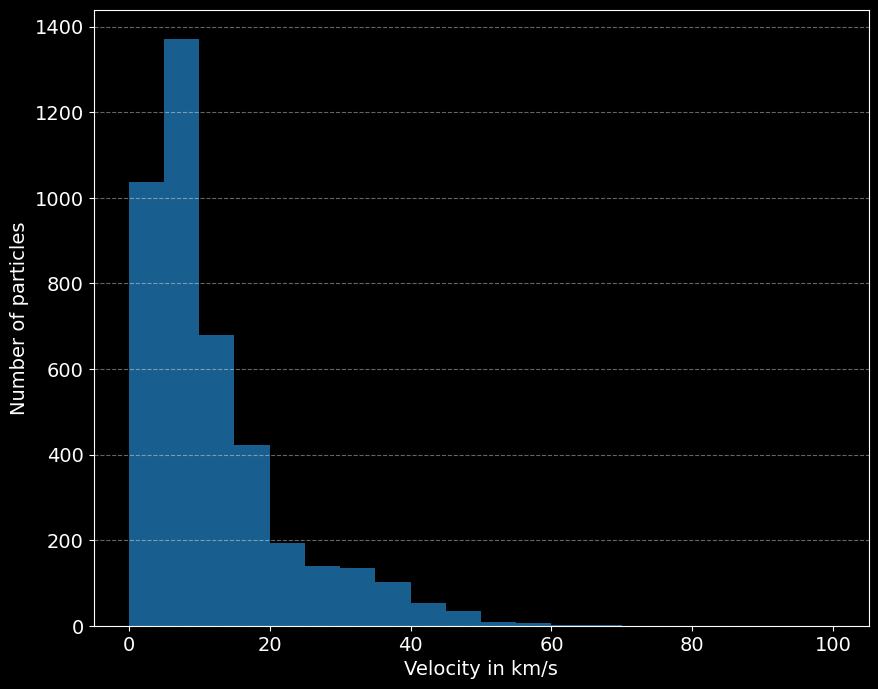

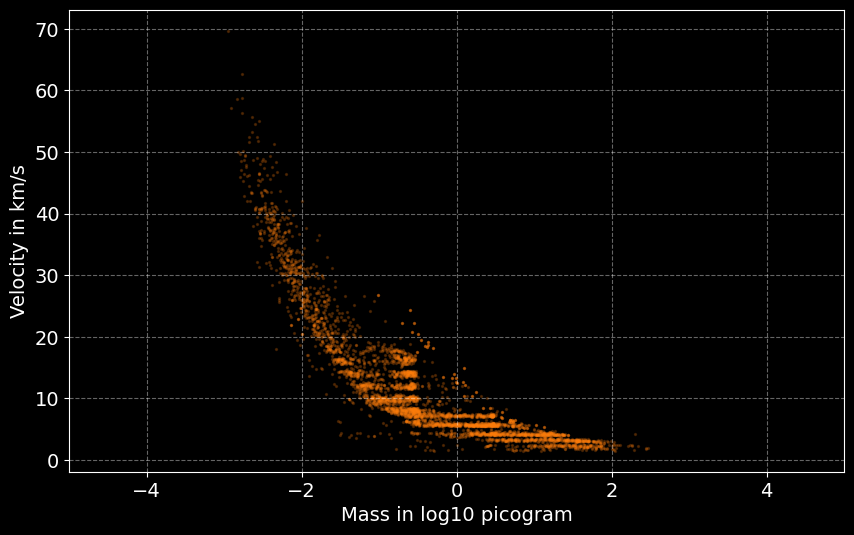

In [38]:
plt.show()

## Some additional statistics

In [39]:
print(f"Number of total events: {len(cal_df)}")
print(f"Number of total IID events: {len(cal_df.loc[cal_df['TAR']=='IID'])}")
print(f"Number of total CAT events: {len(cal_df.loc[cal_df['TAR']=='CAT'])}")

Number of total events: 4184
Number of total IID events: 1650
Number of total CAT events: 2534


In [40]:
# Focusing on IID
iid_cal_df = cal_df.loc[cal_df["TAR"]=="IID"]

iid_qi_cal_df = iid_cal_df.loc[(iid_cal_df["QI_TR"] > 0.0) 
                               & (iid_cal_df["QI_CHARGE"] > 0.0)]

iid_qt_cal_df = iid_cal_df.loc[(iid_cal_df["QT_TR"] > 0.0) 
                               & (iid_cal_df["QT_CHARGE"] > 0.0)]

iid_good_cal_df = iid_cal_df.loc[(iid_cal_df["QI_TR"] > 0.0) 
                                 & (iid_cal_df["QI_CHARGE"] > 0.0)
                                 & (iid_cal_df["QT_TR"] > 0.0) 
                                 & (iid_cal_df["QT_CHARGE"] > 0.0)]

print(f"Number of good QT IID impacts: {len(iid_qt_cal_df)}")
print(f"Number of good QI IID impacts: {len(iid_qi_cal_df)}")
print(f"Number of really good IID impacts: {len(iid_good_cal_df)}")

Number of good QT IID impacts: 1539
Number of good QI IID impacts: 1634
Number of really good IID impacts: 1530


In [41]:
# Focusing on CAT
cat_cal_df = cal_df.loc[cal_df["TAR"]=="CAT"]

cat_qi_cal_df = cat_cal_df.loc[(cat_cal_df["QI_TR"] > 0.0) 
                               & (cat_cal_df["QI_CHARGE"] > 0.0)
                               & (cat_cal_df["MP_PEAKS"] >= 2.0)]

cat_qc_cal_df = cat_cal_df.loc[(cat_cal_df["QC_TR"] > 0.0) 
                               & (cat_cal_df["QC_CHARGE"] > 0.0)
                               & (cat_cal_df["MP_PEAKS"] >= 2.0)]

cat_good_cal_df = cat_cal_df.loc[(cat_cal_df["QI_TR"] > 0.0) 
                                 & (cat_cal_df["QI_CHARGE"] > 0.0)
                                 & (cat_cal_df["QC_TR"] > 0.0) 
                                 & (cat_cal_df["QC_CHARGE"] > 0.0)
                                 & (cat_cal_df["MP_PEAKS"] >= 2.0)]

print(f"Number of good QC CAT impacts: {len(cat_qc_cal_df)}")
print(f"Number of good QI CAT impacts: {len(cat_qi_cal_df)}")
print(f"Number of really good CAT impacts: {len(cat_good_cal_df)}")

Number of good QC CAT impacts: 1528
Number of good QI CAT impacts: 1506
Number of really good CAT impacts: 1498


## Store the data

In [42]:
# Create level1 data
pathlib.Path("data/level1").mkdir(parents=True, exist_ok=True)
cal_df.to_pickle("data/level1/CDA__CAT_IID_cal_data.pkl")